In [6]:
import time
import itertools as it

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from IPython import display

from Node.functions import *
from Node.Node import Control_node
from Plant.Plant import Plant
# from sklearn.preprocessing import normalize

### Simple Behavior (1)

In [36]:
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
B1 = np.random.rand(1, 1)
B2 = np.random.rand(1, 1)

# state/system matrix (maps previous state to future state - how will others behave (give past behaviors)?)
A1 = np.random.rand(1, 1)
A2 = np.random.rand(1, 1)

# reference matrix (how do I expect/want others to behave? target values)
R1 = np.random.rand(1, 1)
R2 = np.random.rand(1, 1)

# Initial behavior
behav_1 = np.random.rand(1, 1)
behav_2 = np.random.rand(1, 1)

# transition matrix (maps control signal and previous state to current state - what behaviors do I enact given my intentions?)
T1 = np.array([0.2])
T2 = np.array([0.2])

color2 = [0.1,0.6,0.2, 0.7]
color2c = [0.2,0.9,0.3, 0.4]

# get the state observation (behaviors of others)
def sense(inputs):
    perception = inputs
    return perception

# contrast reference with observations (and potentially incorporate predictions from internal model)
def compare(sensory_signal, reference, prediction):
    error = reference - sensory_signal
    return error

# generate a control signal
def control(error, behavioral_model, previous_output):
    control_signal = chaotic_controller(behavioral_model, 0.01, error)
    return control_signal

# dictates how control commands determine state transitions - i.e. behaviors
def transition(control_signal, transition_matrix, state):
    new_state = (transition_matrix * control_signal) + state
    new_state[new_state > 1] = 1
    new_state[new_state < 0] = 0
    return new_state


# adjusts behavioral model to get closer to behavior given 
def control_update(error, behavioral_model, previous_output):
    # LMS algorithm
    learning_rate = 0.0
    #behavioral_model = behavioral_model + learning_rate * error * previous_output
    return behavioral_model

# adjusts reference given error
def reference_update_true(reference, error):
    k = 0.1
    reference = reference - (error * k)
    reference[reference > 1] = 1
    reference[reference < 0] = 0
    return reference

# does not adjust reference
def reference_update_false(reference, error):
    k = 0
    reference = reference + (error * k)
    return reference

def reference_update_8_6(reference, error):
    # reference = (matrix_sigmoid(error)-1)*(R1) + matrix_sigmoid(error)*(reference + error)
    sqr_error = np.square(error)
    reference = shifted_sigmoid(sqr_error, 8, 6)*(reference - error) + (1-shifted_sigmoid(sqr_error, 8, 6))*(R1)
    # k = 0.1
    # k =  zero_sigmoid(error)
    # reference = reference - (error * k)
    return reference

# generate predictions on next state
def imc(system_estimate, previous_state, behavioral_model, previous_output):
    # actual estimate
    state = (system_estimate * previous_state) + (behavioral_model * previous_output)
    return state

# adjust system estimate to infer observations given my behavior
def imc_update(inputs, system_estimate, previous_behavior, behavioral_model, previous_state, learning_rate):
    # actual estimate
    #curr_system_est = (system_estimate @ previous_state) + (behavioral_model @ previous_behavior)
    #error = curr_system_est - inputs
    #learning_rate = 0.01
    #system_estimate = system_estimate + learning_rate * error * previous_behavior
    return system_estimate

plant1 = Plant(transition_matrix=T1, transition_function=transition, state=behav_1)
plant2 = Plant(transition_matrix=T2, transition_function=transition, state=behav_2)

conformist1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)

conformist2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)

stubborn = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
system_estimate=A2, reference=R2, init_behavior=behav_2)

sigmoid_8_6 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_8_6,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)


 Sigmoid Model Agents (Error Relative to Expectation)


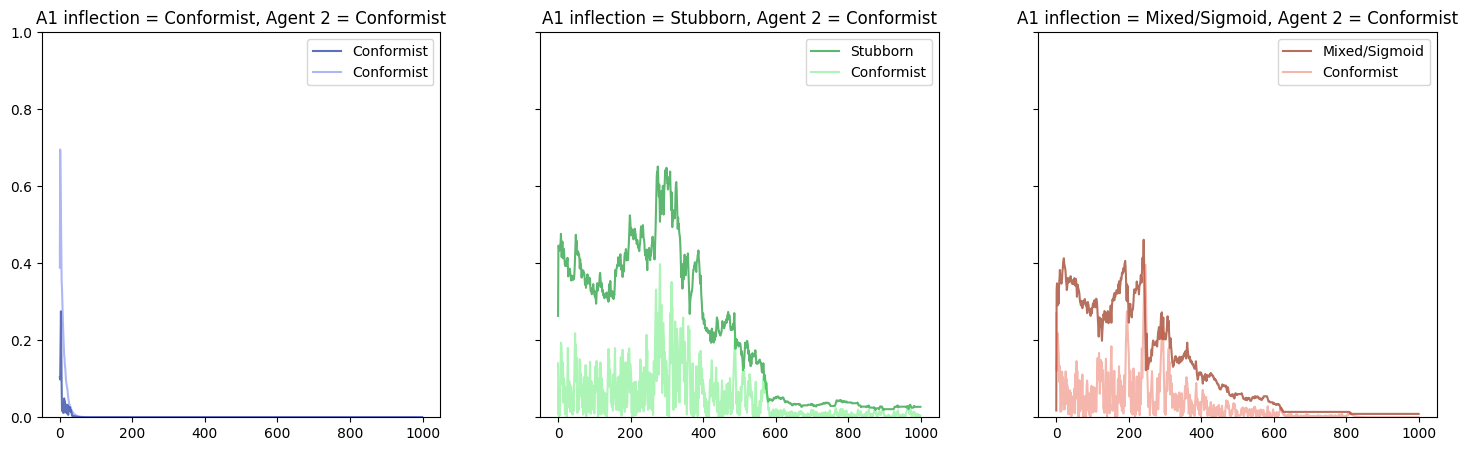

In [40]:
np.random.seed(7)
w = 6; h = 5
ncols = 3
nrows = 1
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))
agents_label = ["Conformist", "Stubborn", "Mixed/Sigmoid"]
agents1 = [conformist2, stubborn, sigmoid_8_6]
agents2 = [conformist1, conformist1, conformist1]
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
trials = 1000
time = [i for i in range(trials)]

color1 = [0.1,0.2,0.6, 0.7]
color1c = [0.2,0.3,0.9, 0.4]
color2 = [0.1,0.6,0.2, 0.7]
color2c = [0.2,0.9,0.3, 0.4]
color3 = [0.6,0.2,0.1, 0.7]
color3c = [0.9,0.3,0.2, 0.4]
colors = [color1,color2,color3]
colors_c = [color1c,color2c,color3c]

for ix, param in enumerate(param_vals):
    # experiments
    conformist1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)

    conformist2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)

    stubborn = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
    system_estimate=A2, reference=R2, init_behavior=behav_2)

    sigmoid_8_6 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_8_6,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)

    plant1 = Plant(transition_matrix=T1, transition_function=transition, state=np.random.rand(1, 1))
    plant2 = Plant(transition_matrix=T2, transition_function=transition, state=np.random.rand(1, 1))

    b1 = np.random.rand(1, 1)
    b2 = np.random.rand(1, 1)

    agent1 = agents1[param%3]
    agent2 = agents2[0]
    agent1_error = []
    agent2_error = []
    for t in range(trials):
        color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
        color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
        #pl.scatter(agent1.get_reference()[0],-0.03, c=color1, edgecolors=[0.8,0.1,0.1, color1[1]])
        #pl.scatter(agent2.get_reference()[0],0, c=color2, edgecolors=[0.8,0.1,0.1, color2[3]], linewidth=1.5)
        b1_control = agent1.go(b2)   
        b2_control = agent2.go(b1)

        # agent1_control.append(agent1.get_output())
        # agent2_control.append(agent2.get_output())

        b1 = plant1.transition(b1_control)
        b2 = plant2.transition(b2_control)
        
        # agent1_behaviors.append(b1)
        # agent2_behaviors.append(b2)

        # agent1_error.append(np.absolute(agent1.get_error()))
        # agent2_error.append(np.absolute(agent2.get_error()))
        agent1_error.append(np.sum(np.absolute(agent1.get_error()[0]))/len(agent1.get_error()[0]))
        agent2_error.append(np.sum(np.absolute(agent2.get_error()[0]))/len(agent2.get_error()[0]))

        # agent1_reference.append(agent1.get_reference()[0])
        # agent2_reference.append(agent2.get_reference()[0])

    ai = tups[ix][1]
    color = colors[param]
    color_c = colors_c[param]
    # plots
    ax[ai].plot(time, agent1_error, color=color, label=agents_label[param])
    ax[ai].plot(time, agent2_error, color=color_c, label="Conformist")
    ax[ai].set_title('A1 inflection = {}, Agent 2 = Conformist'.format(agents_label[param%3]))
    ax[ai].legend()
    # ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x')
    ax[ai].tick_params(axis='y')

print("\n Sigmoid Model Agents (Error Relative to Expectation)")
# print("Agent 1 base reference: {}".format(R1))
# print("Agent 2 base reference: {}".format(R2))
plt.show()

### Complex Behavior (100)

In [54]:
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
B1 = np.random.rand(100, 100)
B2 = np.random.rand(100, 100)

# state/system matrix (maps previous state to future state - how will others behave (give past behaviors)?)
A1 = np.random.rand(100, 100)
A2 = np.random.rand(100, 100)

# reference matrix (how do I expect/want others to behave? target values)
R1 = np.random.rand(1, 100)
R2 = np.random.rand(1, 100)

# Initial behavior
behav_1 = np.random.rand(1, 100)
behav_2 = np.random.rand(1, 100)

# transition matrix (maps control signal and previous state to current state - what behaviors do I enact given my intentions?)
T1 = np.array([0.2])
T2 = np.array([0.2])

color2 = [0.1,0.6,0.2, 0.7]
color2c = [0.2,0.9,0.3, 0.4]

# get the state observation (behaviors of others)
def sense(inputs):
    perception = inputs
    return perception

# contrast reference with observations (and potentially incorporate predictions from internal model)
def compare(sensory_signal, reference, prediction):
    error = reference - sensory_signal
    return error

# generate a control signal
def control(error, behavioral_model, previous_output):
    control_signal = chaotic_controller(behavioral_model, 0.01, error)
    return control_signal

# dictates how control commands determine state transitions - i.e. behaviors
def transition(control_signal, transition_matrix, state):
    new_state = (transition_matrix * control_signal) + state
    new_state[new_state > 1] = 1
    new_state[new_state < 0] = 0
    return new_state


# adjusts behavioral model to get closer to behavior given 
def control_update(error, behavioral_model, previous_output):
    # LMS algorithm
    learning_rate = 0.0
    #behavioral_model = behavioral_model + learning_rate * error * previous_output
    return behavioral_model

# adjusts reference given error
def reference_update_true(reference, error):
    k = 0.8
    reference = reference - (error * k)
    reference[reference > 1] = 1
    reference[reference < 0] = 0
    return reference

# does not adjust reference
def reference_update_false(reference, error):
    k = 0
    reference = reference + (error * k)
    return reference

def reference_update_8_6(reference, error):
    # reference = (matrix_sigmoid(error)-1)*(R1) + matrix_sigmoid(error)*(reference + error)
    sqr_error = np.square(error)
    reference = shifted_sigmoid(sqr_error, 8, 6)*(reference - error) + (1-shifted_sigmoid(sqr_error, 8, 6))*(R1)
    # k = 0.1
    # k =  zero_sigmoid(error)
    # reference = reference - (error * k)
    return reference

# generate predictions on next state
def imc(system_estimate, previous_state, behavioral_model, previous_output):
    # actual estimate
    state = (system_estimate * previous_state) + (behavioral_model * previous_output)
    return state

# adjust system estimate to infer observations given my behavior
def imc_update(inputs, system_estimate, previous_behavior, behavioral_model, previous_state, learning_rate):
    # actual estimate
    #curr_system_est = (system_estimate @ previous_state) + (behavioral_model @ previous_behavior)
    #error = curr_system_est - inputs
    #learning_rate = 0.01
    #system_estimate = system_estimate + learning_rate * error * previous_behavior
    return system_estimate

plant1 = Plant(transition_matrix=T1, transition_function=transition, state=behav_1)
plant2 = Plant(transition_matrix=T2, transition_function=transition, state=behav_2)

conformist1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)

conformist2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)

stubborn = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
system_estimate=A2, reference=R2, init_behavior=behav_2)

sigmoid_8_6 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_8_6,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)


 Sigmoid Model Agents (Error Relative to Expectation)


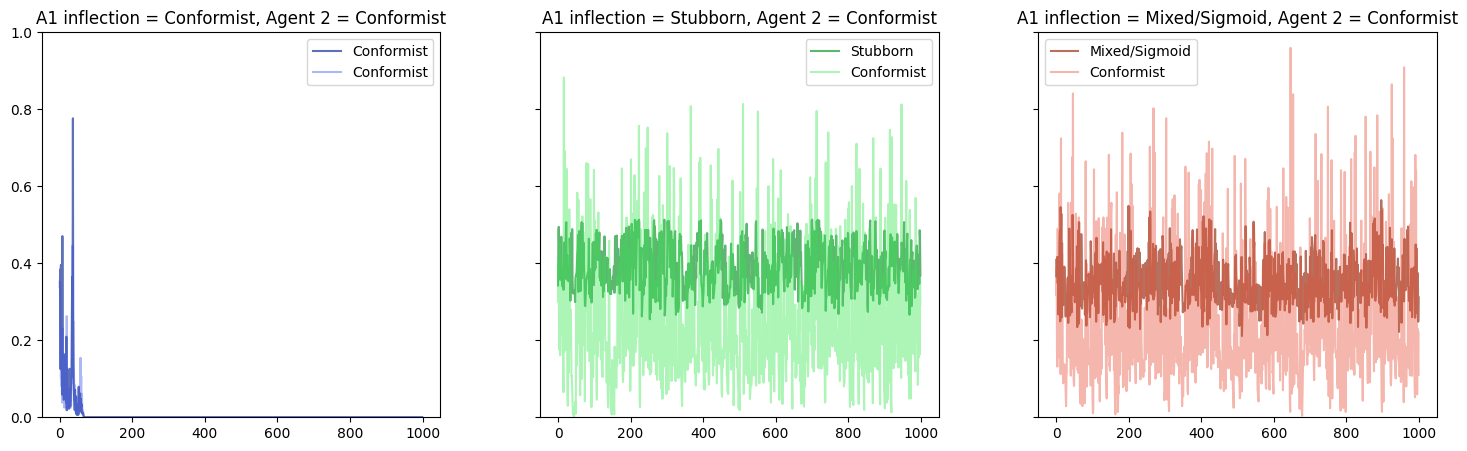

In [55]:
np.random.seed(31)
w = 6; h = 5
ncols = 3
nrows = 1
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))
agents_label = ["Conformist", "Stubborn", "Mixed/Sigmoid"]
agents1 = [conformist2, stubborn, sigmoid_8_6]
agents2 = [conformist1, conformist1, conformist1]
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
trials = 1000
time = [i for i in range(trials)]

color1 = [0.1,0.2,0.6, 0.7]
color1c = [0.2,0.3,0.9, 0.4]
color2 = [0.1,0.6,0.2, 0.7]
color2c = [0.2,0.9,0.3, 0.4]
color3 = [0.6,0.2,0.1, 0.7]
color3c = [0.9,0.3,0.2, 0.4]
colors = [color1,color2,color3]
colors_c = [color1c,color2c,color3c]

for ix, param in enumerate(param_vals):
    # experiments
    conformist1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)

    conformist2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)

    stubborn = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
    system_estimate=A2, reference=R2, init_behavior=behav_2)

    sigmoid_8_6 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_8_6,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)

    plant1 = Plant(transition_matrix=T1, transition_function=transition, state=np.random.rand(1, 100))
    plant2 = Plant(transition_matrix=T2, transition_function=transition, state=np.random.rand(1, 100))

    b1 = np.random.rand(1, 100)
    b2 = np.random.rand(1, 100)

    agent1 = agents1[param%3]
    agent2 = agents2[0]
    agent1_error = []
    agent2_error = []
    for t in range(trials):
        color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
        color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
        #pl.scatter(agent1.get_reference()[0],-0.03, c=color1, edgecolors=[0.8,0.1,0.1, color1[1]])
        #pl.scatter(agent2.get_reference()[0],0, c=color2, edgecolors=[0.8,0.1,0.1, color2[3]], linewidth=1.5)
        b1_control = agent1.go(b2)   
        b2_control = agent2.go(b1)

        # agent1_control.append(agent1.get_output())
        # agent2_control.append(agent2.get_output())

        b1 = plant1.transition(b1_control)
        b2 = plant2.transition(b2_control)
        
        # agent1_behaviors.append(b1)
        # agent2_behaviors.append(b2)

        # agent1_error.append(np.absolute(agent1.get_error()))
        # agent2_error.append(np.absolute(agent2.get_error()))
        agent1_error.append(np.sum(np.absolute(agent1.get_error()[0]))/len(agent1.get_error()[0]))
        agent2_error.append(np.sum(np.absolute(agent2.get_error()[0]))/len(agent2.get_error()[0]))

        # agent1_reference.append(agent1.get_reference()[0])
        # agent2_reference.append(agent2.get_reference()[0])

    ai = tups[ix][1]
    color = colors[param]
    color_c = colors_c[param]
    # plots
    ax[ai].plot(time, agent1_error, color=color, label=agents_label[param])
    ax[ai].plot(time, agent2_error, color=color_c, label="Conformist")
    ax[ai].set_title('A1 inflection = {}, Agent 2 = Conformist'.format(agents_label[param%3]))
    ax[ai].legend()
    # ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x')
    ax[ai].tick_params(axis='y')

print("\n Sigmoid Model Agents (Error Relative to Expectation)")
# print("Agent 1 base reference: {}".format(R1))
# print("Agent 2 base reference: {}".format(R2))
plt.show()

### Less Complex (10)

In [98]:
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
B1 = np.random.rand(10, 10)
B2 = np.random.rand(10, 10)

# state/system matrix (maps previous state to future state - how will others behave (give past behaviors)?)
A1 = np.random.rand(10, 10)
A2 = np.random.rand(10, 10)

# reference matrix (how do I expect/want others to behave? target values)
R1 = np.random.rand(1, 10)
R2 = np.random.rand(1, 10)

# Initial behavior
behav_1 = np.random.rand(1, 10)
behav_2 = np.random.rand(1, 10)

# transition matrix (maps control signal and previous state to current state - what behaviors do I enact given my intentions?)
T1 = np.array([0.2])
T2 = np.array([0.2])

color2 = [0.1,0.6,0.2, 0.7]
color2c = [0.2,0.9,0.3, 0.4]

# get the state observation (behaviors of others)
def sense(inputs):
    perception = inputs
    return perception

# contrast reference with observations (and potentially incorporate predictions from internal model)
def compare(sensory_signal, reference, prediction):
    error = reference - sensory_signal
    return error

# generate a control signal
def control(error, behavioral_model, previous_output):
    control_signal = chaotic_controller(behavioral_model, 0.01, error)
    return control_signal

# dictates how control commands determine state transitions - i.e. behaviors
def transition(control_signal, transition_matrix, state):
    new_state = (transition_matrix * control_signal) + state
    new_state[new_state > 1] = 1
    new_state[new_state < 0] = 0
    return new_state


# adjusts behavioral model to get closer to behavior given 
def control_update(error, behavioral_model, previous_output):
    # LMS algorithm
    learning_rate = 0.0
    #behavioral_model = behavioral_model + learning_rate * error * previous_output
    return behavioral_model

# adjusts reference given error
def reference_update_true(reference, error):
    k = 0.5
    reference = reference - (error * k)
    reference[reference > 1] = 1
    reference[reference < 0] = 0
    return reference

def reference_update_8_6(reference, error):
    # reference = (matrix_sigmoid(error)-1)*(R1) + matrix_sigmoid(error)*(reference + error)
    sqr_error = np.square(error)
    reference = shifted_sigmoid(sqr_error, 20, 0.5)*(reference - error) + (1-shifted_sigmoid(sqr_error, 20, 0.5))*(R1)
    # k = 0.1
    # k =  zero_sigmoid(error)
    # reference = reference - (error * k)
    return reference

# generate predictions on next state
def imc(system_estimate, previous_state, behavioral_model, previous_output):
    # actual estimate
    state = (system_estimate * previous_state) + (behavioral_model * previous_output)
    return state

# adjust system estimate to infer observations given my behavior
def imc_update(inputs, system_estimate, previous_behavior, behavioral_model, previous_state, learning_rate):
    # actual estimate
    #curr_system_est = (system_estimate @ previous_state) + (behavioral_model @ previous_behavior)
    #error = curr_system_est - inputs
    #learning_rate = 0.01
    #system_estimate = system_estimate + learning_rate * error * previous_behavior
    return system_estimate

plant1 = Plant(transition_matrix=T1, transition_function=transition, state=behav_1)
plant2 = Plant(transition_matrix=T2, transition_function=transition, state=behav_2)

conformist1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)

conformist2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)

stubborn = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
system_estimate=A2, reference=R2, init_behavior=behav_2)

sigmoid_8_6 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_8_6,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)


 Sigmoid Model Agents (Error Relative to Expectation)


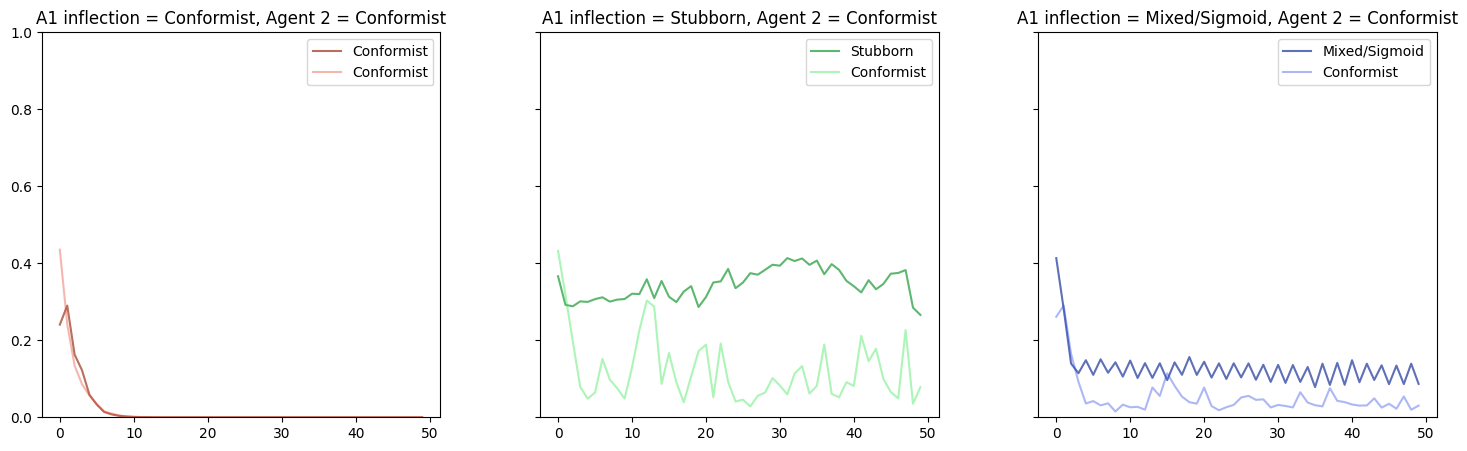

In [126]:
np.random.seed(3)
w = 6; h = 5
ncols = 3
nrows = 1
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))
agents_label = ["Conformist", "Stubborn", "Mixed/Sigmoid"]
agents1 = [conformist2, stubborn, sigmoid_8_6]
agents2 = [conformist1, conformist1, conformist1]
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
trials = 50
time = [i for i in range(trials)]


color1 = [0.6,0.2,0.1, 0.7]
color1c = [0.9,0.3,0.2, 0.4]
color2 = [0.1,0.6,0.2, 0.7]
color2c = [0.2,0.9,0.3, 0.4]
color3 = [0.1,0.2,0.6, 0.7]
color3c = [0.2,0.3,0.9, 0.4]
colors = [color1,color2,color3]
colors_c = [color1c,color2c,color3c]

agent1_pref_errors = []
agent2_pref_errors = []

for ix, param in enumerate(param_vals):
    # experiments
    conformist1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)

    conformist2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)

    stubborn = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
    system_estimate=A2, reference=R2, init_behavior=behav_2)

    sigmoid_8_6 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_8_6,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)

    plant1 = Plant(transition_matrix=T1, transition_function=transition, state=np.random.rand(1, 10))
    plant2 = Plant(transition_matrix=T2, transition_function=transition, state=np.random.rand(1, 10))

    b1 = np.random.rand(1, 10)
    b2 = np.random.rand(1, 10)

    agent1 = agents1[param]
    agent2 = agents2[0]
    agent1_error = []
    agent2_error = []
    agent1_pref_error = []
    agent2_pref_error = []
    for t in range(trials):
        color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
        color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
        #pl.scatter(agent1.get_reference()[0],-0.03, c=color1, edgecolors=[0.8,0.1,0.1, color1[1]])
        #pl.scatter(agent2.get_reference()[0],0, c=color2, edgecolors=[0.8,0.1,0.1, color2[3]], linewidth=1.5)
        b1_control = agent1.go(b2)   
        b2_control = agent2.go(b1)

        # agent1_control.append(agent1.get_output())
        # agent2_control.append(agent2.get_output())

        b1 = plant1.transition(b1_control)
        b2 = plant2.transition(b2_control)
        
        # agent1_behaviors.append(b1)
        # agent2_behaviors.append(b2)

        # agent1_error.append(np.absolute(agent1.get_error()))
        # agent2_error.append(np.absolute(agent2.get_error()))
        agent1_error.append(np.sum(np.absolute(agent1.get_error()[0]))/len(agent1.get_error()[0]))
        agent2_error.append(np.sum(np.absolute(agent2.get_error()[0]))/len(agent2.get_error()[0]))
        agent1_pref_error.append(np.sum(np.absolute(R2-b1))/len(agent1.get_error()[0]))
        agent2_pref_error.append(np.sum(np.absolute(R1-b2))/len(agent2.get_error()[0]))

        # agent1_reference.append(agent1.get_reference()[0])
        # agent2_reference.append(agent2.get_reference()[0])
        
    agent1_pref_errors.append(agent1_pref_error)
    agent2_pref_errors.append(agent2_pref_error)
    
    ai = tups[ix][1]
    color = colors[param]
    color_c = colors_c[param]
    # plots
    ax[ai].plot(time, agent1_error, color=color, label=agents_label[param])
    ax[ai].plot(time, agent2_error, color=color_c, label="Conformist")
    ax[ai].set_title('A1 inflection = {}, Agent 2 = Conformist'.format(agents_label[param]))
    ax[ai].legend()
    # ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x')
    ax[ai].tick_params(axis='y')

print("\n Sigmoid Model Agents (Error Relative to Expectation)")
# print("Agent 1 base reference: {}".format(R1))
# print("Agent 2 base reference: {}".format(R2))
plt.show()


 Sigmoid Model Agents (Error Relative to PREFERENCE)


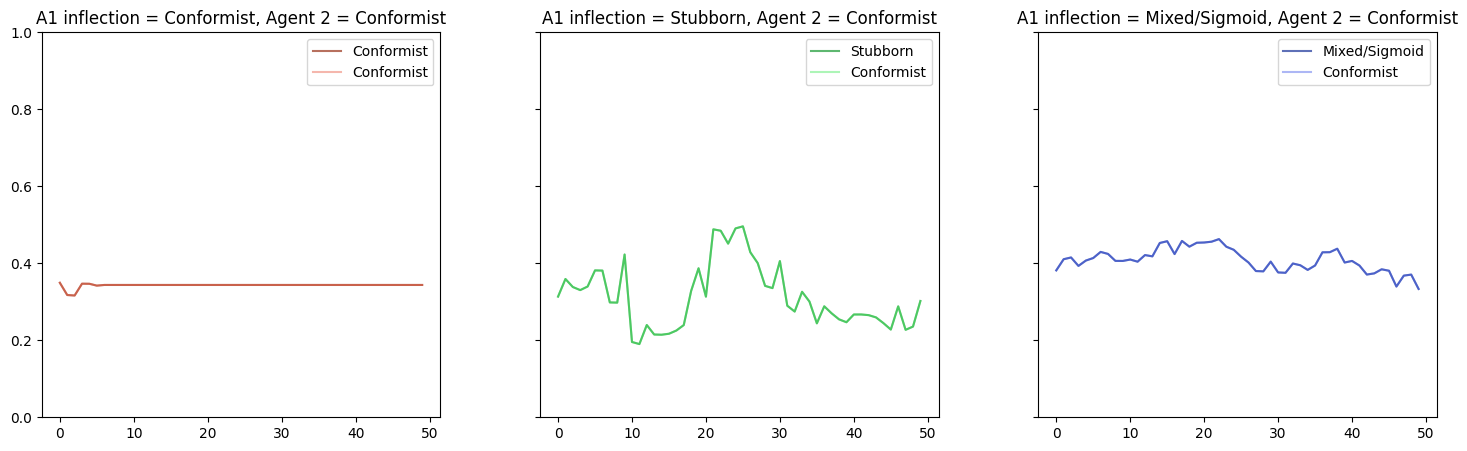

In [127]:

w = 6; h = 5
ncols = 3
nrows = 1
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))
agents_label = ["Conformist", "Stubborn", "Mixed/Sigmoid"]
agents1 = [conformist2, stubborn, sigmoid_8_6]
agents2 = [conformist1, conformist1, conformist1]
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
trials = 50
time = [i for i in range(trials)]


color1 = [0.6,0.2,0.1, 0.7]
color1c = [0.9,0.3,0.2, 0.4]
color2 = [0.1,0.6,0.2, 0.7]
color2c = [0.2,0.9,0.3, 0.4]
color3 = [0.1,0.2,0.6, 0.7]
color3c = [0.2,0.3,0.9, 0.4]
colors = [color1,color2,color3]
colors_c = [color1c,color2c,color3c]

for ix, param in enumerate(param_vals):
    ai = tups[ix][1]
    color = colors[param]
    color_c = colors_c[param]
    # plots
    ax[ai].plot(time, agent1_pref_errors[param], color=color, label=agents_label[param])
    ax[ai].plot(time, agent1_pref_errors[param], color=color_c, label="Conformist")
    ax[ai].set_title('A1 inflection = {}, Agent 2 = Conformist'.format(agents_label[param]))
    ax[ai].legend()
    # ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x')
    ax[ai].tick_params(axis='y')

print("\n Sigmoid Model Agents (Error Relative to PREFERENCE)")


 Sigmoid Model Agents (Error Relative to Expectation)


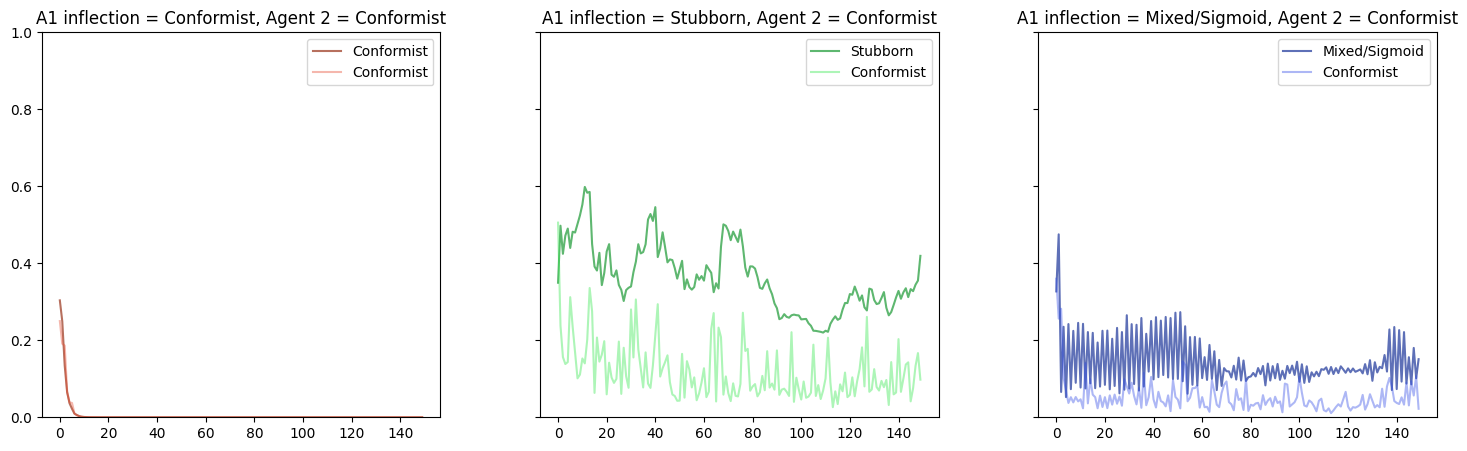

In [96]:
np.random.seed(3)
w = 6; h = 5
ncols = 3
nrows = 1
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))
agents_label = ["Conformist", "Stubborn", "Mixed/Sigmoid"]
agents1 = [conformist2, stubborn, sigmoid_8_6]
agents2 = [conformist1, conformist1, conformist1]
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
trials = 150
time = [i for i in range(trials)]


color1 = [0.6,0.2,0.1, 0.7]
color1c = [0.9,0.3,0.2, 0.4]
color2 = [0.1,0.6,0.2, 0.7]
color2c = [0.2,0.9,0.3, 0.4]
color3 = [0.1,0.2,0.6, 0.7]
color3c = [0.2,0.3,0.9, 0.4]
colors = [color1,color2,color3]
colors_c = [color1c,color2c,color3c]

for ix, param in enumerate(param_vals):
    # experiments
    conformist1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)

    conformist2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)

    stubborn = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
    system_estimate=A2, reference=R2, init_behavior=behav_2)

    sigmoid_8_6 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_8_6,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)

    plant1 = Plant(transition_matrix=T1, transition_function=transition, state=np.random.rand(1, 10))
    plant2 = Plant(transition_matrix=T2, transition_function=transition, state=np.random.rand(1, 10))

    b1 = np.random.rand(1, 10)
    b2 = np.random.rand(1, 10)

    agent1 = agents1[param]
    agent2 = agents2[0]
    agent1_error = []
    agent2_error = []
    for t in range(trials):
        color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
        color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
        #pl.scatter(agent1.get_reference()[0],-0.03, c=color1, edgecolors=[0.8,0.1,0.1, color1[1]])
        #pl.scatter(agent2.get_reference()[0],0, c=color2, edgecolors=[0.8,0.1,0.1, color2[3]], linewidth=1.5)
        b1_control = agent1.go(b2)   
        b2_control = agent2.go(b1)

        # agent1_control.append(agent1.get_output())
        # agent2_control.append(agent2.get_output())

        b1 = plant1.transition(b1_control)
        b2 = plant2.transition(b2_control)
        
        # agent1_behaviors.append(b1)
        # agent2_behaviors.append(b2)

        # agent1_error.append(np.absolute(agent1.get_error()))
        # agent2_error.append(np.absolute(agent2.get_error()))
        agent1_error.append(np.sum(np.absolute(agent1.get_error()[0]))/len(agent1.get_error()[0]))
        agent2_error.append(np.sum(np.absolute(agent2.get_error()[0]))/len(agent2.get_error()[0]))

        # agent1_reference.append(agent1.get_reference()[0])
        # agent2_reference.append(agent2.get_reference()[0])

    ai = tups[ix][1]
    color = colors[param]
    color_c = colors_c[param]
    # plots
    ax[ai].plot(time, agent1_error, color=color, label=agents_label[param])
    ax[ai].plot(time, agent2_error, color=color_c, label="Conformist")
    ax[ai].set_title('A1 inflection = {}, Agent 2 = Conformist'.format(agents_label[param]))
    ax[ai].legend()
    # ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x')
    ax[ai].tick_params(axis='y')

print("\n Sigmoid Model Agents (Error Relative to Expectation)")
# print("Agent 1 base reference: {}".format(R1))
# print("Agent 2 base reference: {}".format(R2))
plt.show()


 Sigmoid Model Agents (Error Relative to Expectation)


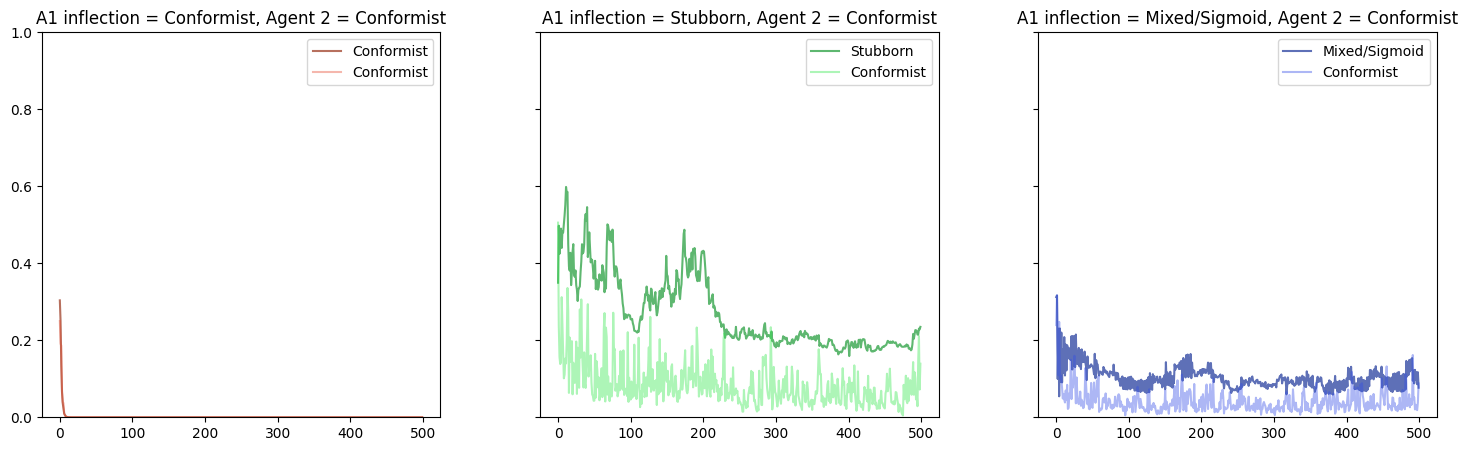

In [97]:
np.random.seed(3)
w = 6; h = 5
ncols = 3
nrows = 1
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))
agents_label = ["Conformist", "Stubborn", "Mixed/Sigmoid"]
agents1 = [conformist2, stubborn, sigmoid_8_6]
agents2 = [conformist1, conformist1, conformist1]
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
trials = 500
time = [i for i in range(trials)]


color1 = [0.6,0.2,0.1, 0.7]
color1c = [0.9,0.3,0.2, 0.4]
color2 = [0.1,0.6,0.2, 0.7]
color2c = [0.2,0.9,0.3, 0.4]
color3 = [0.1,0.2,0.6, 0.7]
color3c = [0.2,0.3,0.9, 0.4]
colors = [color1,color2,color3]
colors_c = [color1c,color2c,color3c]

for ix, param in enumerate(param_vals):
    # experiments
    conformist1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)

    conformist2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)

    stubborn = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
    system_estimate=A2, reference=R2, init_behavior=behav_2)

    sigmoid_8_6 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_8_6,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)

    plant1 = Plant(transition_matrix=T1, transition_function=transition, state=np.random.rand(1, 10))
    plant2 = Plant(transition_matrix=T2, transition_function=transition, state=np.random.rand(1, 10))

    b1 = np.random.rand(1, 10)
    b2 = np.random.rand(1, 10)

    agent1 = agents1[param]
    agent2 = agents2[0]
    agent1_error = []
    agent2_error = []
    for t in range(trials):
        color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
        color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
        #pl.scatter(agent1.get_reference()[0],-0.03, c=color1, edgecolors=[0.8,0.1,0.1, color1[1]])
        #pl.scatter(agent2.get_reference()[0],0, c=color2, edgecolors=[0.8,0.1,0.1, color2[3]], linewidth=1.5)
        b1_control = agent1.go(b2)   
        b2_control = agent2.go(b1)

        # agent1_control.append(agent1.get_output())
        # agent2_control.append(agent2.get_output())

        b1 = plant1.transition(b1_control)
        b2 = plant2.transition(b2_control)
        
        # agent1_behaviors.append(b1)
        # agent2_behaviors.append(b2)

        # agent1_error.append(np.absolute(agent1.get_error()))
        # agent2_error.append(np.absolute(agent2.get_error()))
        agent1_error.append(np.sum(np.absolute(agent1.get_error()[0]))/len(agent1.get_error()[0]))
        agent2_error.append(np.sum(np.absolute(agent2.get_error()[0]))/len(agent2.get_error()[0]))

        # agent1_reference.append(agent1.get_reference()[0])
        # agent2_reference.append(agent2.get_reference()[0])

    ai = tups[ix][1]
    color = colors[param]
    color_c = colors_c[param]
    # plots
    ax[ai].plot(time, agent1_error, color=color, label=agents_label[param])
    ax[ai].plot(time, agent2_error, color=color_c, label="Conformist")
    ax[ai].set_title('A1 inflection = {}, Agent 2 = Conformist'.format(agents_label[param]))
    ax[ai].legend()
    # ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x')
    ax[ai].tick_params(axis='y')

print("\n Sigmoid Model Agents (Error Relative to Expectation)")
# print("Agent 1 base reference: {}".format(R1))
# print("Agent 2 base reference: {}".format(R2))
plt.show()


 Sigmoid Model Agents (Error Relative to Expectation)


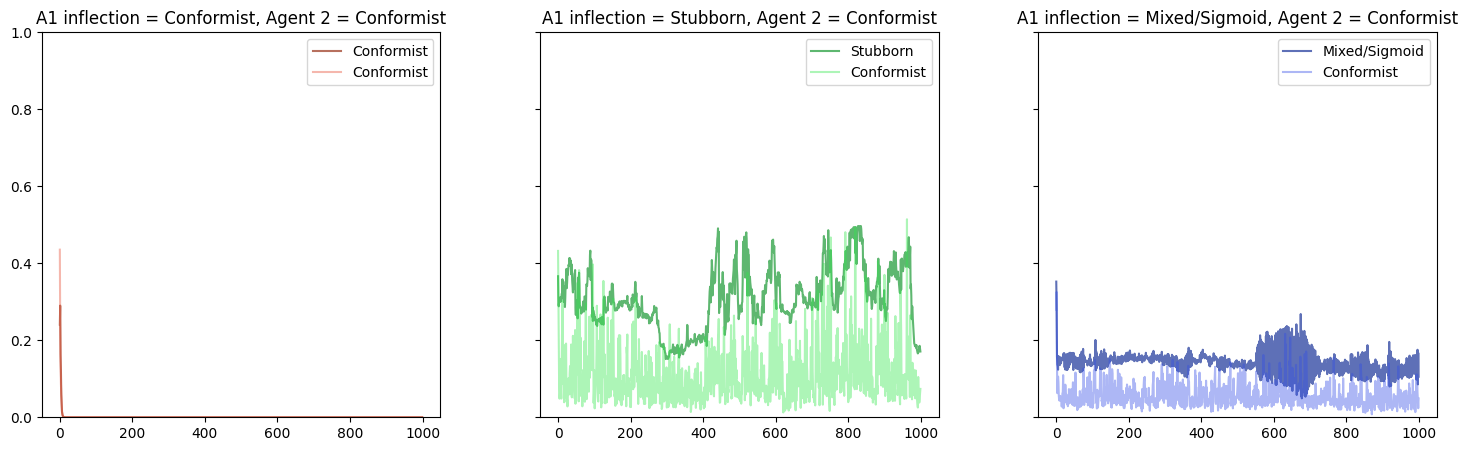

In [99]:
np.random.seed(3)
w = 6; h = 5
ncols = 3
nrows = 1
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))
agents_label = ["Conformist", "Stubborn", "Mixed/Sigmoid"]
agents1 = [conformist2, stubborn, sigmoid_8_6]
agents2 = [conformist1, conformist1, conformist1]
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
trials = 1000
time = [i for i in range(trials)]


color1 = [0.6,0.2,0.1, 0.7]
color1c = [0.9,0.3,0.2, 0.4]
color2 = [0.1,0.6,0.2, 0.7]
color2c = [0.2,0.9,0.3, 0.4]
color3 = [0.1,0.2,0.6, 0.7]
color3c = [0.2,0.3,0.9, 0.4]
colors = [color1,color2,color3]
colors_c = [color1c,color2c,color3c]

for ix, param in enumerate(param_vals):
    # experiments
    conformist1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)

    conformist2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)

    stubborn = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
    system_estimate=A2, reference=R2, init_behavior=behav_2)

    sigmoid_8_6 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_8_6,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)

    plant1 = Plant(transition_matrix=T1, transition_function=transition, state=np.random.rand(1, 10))
    plant2 = Plant(transition_matrix=T2, transition_function=transition, state=np.random.rand(1, 10))

    b1 = np.random.rand(1, 10)
    b2 = np.random.rand(1, 10)

    agent1 = agents1[param]
    agent2 = agents2[0]
    agent1_error = []
    agent2_error = []
    for t in range(trials):
        color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
        color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
        #pl.scatter(agent1.get_reference()[0],-0.03, c=color1, edgecolors=[0.8,0.1,0.1, color1[1]])
        #pl.scatter(agent2.get_reference()[0],0, c=color2, edgecolors=[0.8,0.1,0.1, color2[3]], linewidth=1.5)
        b1_control = agent1.go(b2)   
        b2_control = agent2.go(b1)

        # agent1_control.append(agent1.get_output())
        # agent2_control.append(agent2.get_output())

        b1 = plant1.transition(b1_control)
        b2 = plant2.transition(b2_control)
        
        # agent1_behaviors.append(b1)
        # agent2_behaviors.append(b2)

        # agent1_error.append(np.absolute(agent1.get_error()))
        # agent2_error.append(np.absolute(agent2.get_error()))
        agent1_error.append(np.sum(np.absolute(agent1.get_error()[0]))/len(agent1.get_error()[0]))
        agent2_error.append(np.sum(np.absolute(agent2.get_error()[0]))/len(agent2.get_error()[0]))

        # agent1_reference.append(agent1.get_reference()[0])
        # agent2_reference.append(agent2.get_reference()[0])

    ai = tups[ix][1]
    color = colors[param]
    color_c = colors_c[param]
    # plots
    ax[ai].plot(time, agent1_error, color=color, label=agents_label[param])
    ax[ai].plot(time, agent2_error, color=color_c, label="Conformist")
    ax[ai].set_title('A1 inflection = {}, Agent 2 = Conformist'.format(agents_label[param]))
    ax[ai].legend()
    # ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x')
    ax[ai].tick_params(axis='y')

print("\n Sigmoid Model Agents (Error Relative to Expectation)")
# print("Agent 1 base reference: {}".format(R1))
# print("Agent 2 base reference: {}".format(R2))
plt.show()

In [8]:
%matplotlib inline
np.random.seed(17)
trials = 1000
color = (0.1,0.2,0.8,0.1)
agent1_control = []
agent2_control = []
agent1_behaviors = []
agent2_behaviors = []
agent1_error = []
agent2_error = []
# t9 = ['-1', '0', '50', '100', '150', '200', '150', '100', '50', '0',  '-1']

b1 = behav_1
b2 = behav_2

for t in range(trials):
    color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
    color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
    #pl.scatter(agent1.get_reference()[0],-0.03, c=color1, edgecolors=[0.8,0.1,0.1, color1[1]])
    #pl.scatter(agent2.get_reference()[0],0, c=color2, edgecolors=[0.8,0.1,0.1, color2[3]], linewidth=1.5)
    b1_control = agent1.go(b2)   
    b2_control = agent2.go(b1)

    agent1_control.append(agent1.get_output())
    agent2_control.append(agent2.get_output())

    b1 = plant1.transition(b1_control)
    b2 = plant2.transition(b2_control)

    agent1_behaviors.append(b1)
    agent2_behaviors.append(b2)

    # avg_abs_error = np.sum(abs(dif))/len(dif)
    agent1_error.append(np.sum(np.absolute(agent1.get_error()[0]))/len(agent1.get_error()[0]))
    agent2_error.append(np.sum(np.absolute(agent2.get_error()[0]))/len(agent2.get_error()[0]))
    # agent1_error.append(np.absolute(agent1.get_error()))
    # agent2_error.append(np.absolute(agent2.get_error()))
    # if t%200 == 0:
    #     print("1 Reference: ", agent1.get_reference())
    #     print("2 Behavior: ", b2)
    #     print("1 Error: ", agent1.get_error())
    #     print("2 Reference: ", agent2.get_reference())
    #     print("1 Behavior: ", b1)
    #     print("2 Error: ", agent2.get_error())

#     if t % 25 == 0:
#         pl.scatter(b1[0],-1+(t+1)/(trials+1),c=tuple(color1))
#         pl.scatter(b2[0],1-(t+1)/(trials+1),c=tuple(color2))
#         pl.scatter(agent1.get_reference()[0],1-(t+1)/(trials+1),c=tuple(color1), marker="_")
#         pl.scatter(agent2.get_reference()[0],-1+(t+1)/(trials+1),c=tuple(color2), marker="_")
#         display.clear_output(wait=True)
#         display.display(pl.gcf())
#         plt.legend([b1, b2, [agent1.get_reference()[0],0.00],[agent2.get_reference()[0],0.00]], labels=["Conformist Behavior", "Stubborn Behavior","Conformist Reference Signal", "Stubborn Reference Signal"])
#         lg = plt.gca().get_legend()
#         lg.legendHandles[0].set_color((0.1,0.1,0.8))
#         # lg.legendHandles[0].set_edgecolor((0.1,0.1,0.8))
#         lg.legendHandles[1].set_color((0.1,0.8,0.1))
#         # lg.legendHandles[1].set_edgecolor((0.1,0.8,0.1))
#         lg.legendHandles[2].set_color((0.1,0.1,0.8))
#         lg.legendHandles[3].set_color((0.1,0.8,0.1))
#         pl.title("Conformist Interaction with Stubborn Agent", fontsize=20, pad=20)
#         plt.xlabel("Behavior Value (X Position)", fontsize=16)
#         plt.ylabel("Time Step", fontsize=16)
#     #time.sleep(0.1)
# plt.gca().set_yticklabels(t9)


In [9]:
# print(agent2_error[-1])
# print(agent2.get_error()[0][0])
# print(np.absolute(agent2.get_error()[0]))

# print(agent2_behaviors[-1][0][0])
# print(agent1.get_error()[0][0])
# print(agent1.get_reference()[0][0])
# print(agent1.get_reference()[0][0]-agent2_behaviors[-1][0][0])
# print(agent1.get_reference()[0]-agent2_behaviors[-1][0])

# print(agent2_behaviors[-2][0][0])
# print(agent1.get_error()[0][-2])

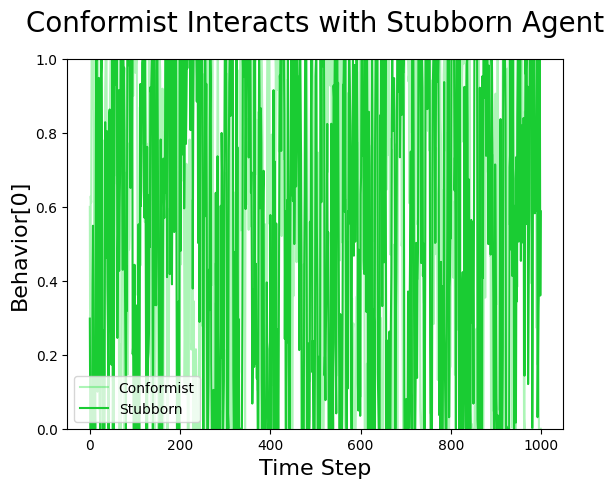

In [10]:
t = [n for n in range(trials)]
agent_1_first_behaviors = [b[0][0] for b in agent1_behaviors]
agent_2_first_behaviors = [b[0][0] for b in agent2_behaviors]
plt.plot(t, agent_1_first_behaviors, color=color2c,label="Conformist")
plt.plot(t, agent_2_first_behaviors, color=color2, label="Stubborn")
plt.legend()
plt.title("Conformist Interacts with Stubborn Agent", fontsize=20, pad=20)
plt.xlabel("Time Step", fontsize=16)
plt.ylabel("Behavior[0]", fontsize=16)
plt.ylim(0,1)
plt.show()


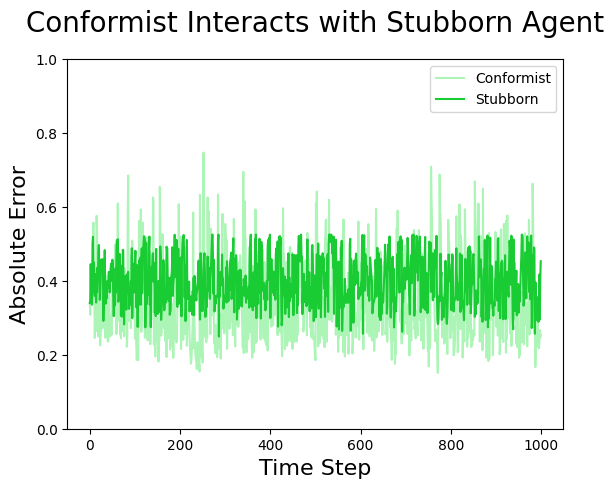

In [11]:
t = [n for n in range(trials)]
plt.plot(t, agent1_error, color=color2c,label="Conformist")
plt.plot(t, agent2_error, color=color2, label="Stubborn")
plt.legend()
plt.title("Conformist Interacts with Stubborn Agent", fontsize=20, pad=20)
plt.xlabel("Time Step", fontsize=16)
plt.ylabel("Absolute Error", fontsize=16)
plt.ylim(0,1)
plt.show()

In [1]:
# run experiments
experiments = 400
trials = 1000
color = (0.1,0.2,0.8,0.1)
np.random.seed(29)
agent1_errors = []
agent2_errors = []

#pl.scatter(R1[0],0, c=(0.1,0.8,0.8), edgecolors=[0.8,0.1,0.1], linewidths=1.5)
for e in range(experiments):
    agent1_control = []
    agent2_control = []
    agent1_behaviors = []
    agent2_behaviors = []
    agent1_error = []
    agent2_error = []
    R1 = np.random.rand(1,2)
    R2 = np.random.rand(1,2)

    # Initial behavior
    behav_1 = np.random.rand(1,2)
    behav_2 = np.random.rand(1,2)

    
    agent1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)
    plant1 = Plant(transition_matrix=T1, transition_function=transition, state=behav_1)

    agent2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
    system_estimate=A2, reference=R2, init_behavior=behav_2)
    plant2 = Plant(transition_matrix=T2, transition_function=transition, state=behav_2)

    b1 = behav_1
    b2 = behav_2
    for t in range(trials):
        b1_control = agent1.go(b2)   
        b2_control = agent2.go(b1)

        agent1_control.append(agent1.get_output())
        agent2_control.append(agent2.get_output())

        b1 = plant1.transition(b1_control)
        b2 = plant2.transition(b2_control)

        agent1_behaviors.append(b1)
        agent2_behaviors.append(b2)

        agent1_error.append(np.sum(np.absolute(agent1.get_error()))/len(agent1.get_error()))
        agent2_error.append(np.sum(np.absolute(agent2.get_error()))/len(agent2.get_error()))
        # agent1_error.append(np.absolute(agent1.get_error()))
        # agent2_error.append(np.absolute(agent2.get_error()))
        # aggregate the errors across experiments
    agent1_errors.append(agent1_error)
    agent2_errors.append(agent2_error)

NameError: name 'np' is not defined

In [ ]:
# convert to matrix
error1_mat = np.array(agent1_errors)
error2_mat = np.array(agent2_errors)

mean_error1 = np.average(error1_mat, axis=0)
mean_error2 = np.average(error2_mat, axis=0)
std_error1  = error1_mat.std(0)
std_error2  = error2_mat.std(0)
t = [n for n in range(trials)]
ci1 = 1.96 * std_error1/np.sqrt(trials)
ci2 = 1.96 * std_error2/np.sqrt(trials)

upper1 = mean_error1+ci1
lower1 = mean_error1-ci1
upper1 = upper1.reshape(trials,)
lower1 = lower1.reshape(trials,)
upper2 = mean_error2+ci2
lower2 = mean_error2-ci2
upper2 = upper2.reshape(trials,)
lower2 = lower2.reshape(trials,)
fig, ax = plt.subplots()
ax.plot(t,mean_error1, color=color2c,label="Conformist")
ax.plot(t,mean_error2, color=color2, label="Stubborn")
ax.fill_between(t, lower1, upper1, color=color2c, alpha=.1)
ax.fill_between(t, lower2, upper2, color=color2, alpha=.1)
plt.legend()
plt.ylim(0,1)
plt.title("Aggregated Interactions", fontsize=20, pad=20)
plt.xlabel("Time Step", fontsize=16)
plt.ylabel("Mean Absolute Error", fontsize=16)


## Comparing models

In [4]:
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
B1 = np.random.rand(100, 100)
B2 = np.random.rand(100, 100)

# state/system matrix (maps previous state to future state - how will others behave (give past behaviors)?)
A1 = np.random.rand(100, 100)
A2 = np.random.rand(100, 100)

# reference matrix (how do I expect/want others to behave? target values)
R1 = np.random.rand(1, 100)
R2 = np.random.rand(1, 100)

# Initial behavior
behav_1 = np.random.rand(1, 100)
behav_2 = np.random.rand(1, 100)

# transition matrix (maps control signal and previous state to current state - what behaviors do I enact given my intentions?)
T1 = np.array([0.2])
T2 = np.array([0.2])


# get the state observation (behaviors of others)
def sense(inputs):
    perception = inputs
    return perception

# contrast reference with observations (and potentially incorporate predictions from internal model)
def compare(sensory_signal, reference, prediction):
    error = reference - sensory_signal
    return error

# generate a control signal
def control(error, behavioral_model, previous_output):
    control_signal = chaotic_controller(behavioral_model, 0.01, error)
    return control_signal

# dictates how control commands determine state transitions - i.e. behaviors
def transition(control_signal, transition_matrix, state):
    new_state = (transition_matrix * control_signal) + state
    new_state[new_state > 1] = 1
    new_state[new_state < 0] = 0
    return new_state


# adjusts behavioral model to get closer to behavior given 
def control_update(error, behavioral_model, previous_output):
    # LMS algorithm
    learning_rate = 0.0
    #behavioral_model = behavioral_model + learning_rate * error * previous_output
    return behavioral_model



# generate predictions on next state
def imc(system_estimate, previous_state, behavioral_model, previous_output):
    # actual estimate
    state = (system_estimate * previous_state) + (behavioral_model * previous_output)
    return state

# adjust system estimate to infer observations given my behavior
def imc_update(inputs, system_estimate, previous_behavior, behavioral_model, previous_state, learning_rate):
    # actual estimate
    #curr_system_est = (system_estimate @ previous_state) + (behavioral_model @ previous_behavior)
    #error = curr_system_est - inputs
    #learning_rate = 0.01
    #system_estimate = system_estimate + learning_rate * error * previous_behavior
    return system_estimate

# adjusts reference given error
def reference_update_conform(reference, error):
    k = 0.1
    reference = reference - (error * k)
    reference[reference > 1] = 1
    reference[reference < 0] = 0
    return reference

# does not adjust reference
def reference_update_false(reference, error):
    k = 0
    reference = reference + (error * k)
    return reference


def reference_update_8_6(reference, error):
    # reference = (matrix_sigmoid(error)-1)*(R1) + matrix_sigmoid(error)*(reference + error)
    sqr_error = np.square(error)
    reference = shifted_sigmoid(sqr_error, 8, 6)*(reference - error) + (1-shifted_sigmoid(sqr_error, 8, 6))*(R1)
    # k = 0.1
    # k =  zero_sigmoid(error)
    # reference = reference - (error * k)
    return reference

conformist = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_conform,
        controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
        system_estimate=A2, reference=R2, init_behavior=behav_2)

agent_8_6 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_8_6,
        controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
        system_estimate=A1, reference=R1, init_behavior=behav_1)

stubborn = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
        controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
        system_estimate=A1, reference=R1, init_behavior=behav_1)

conformist2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_conform,
        controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
        system_estimate=A1, reference=R1, init_behavior=behav_1)

ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

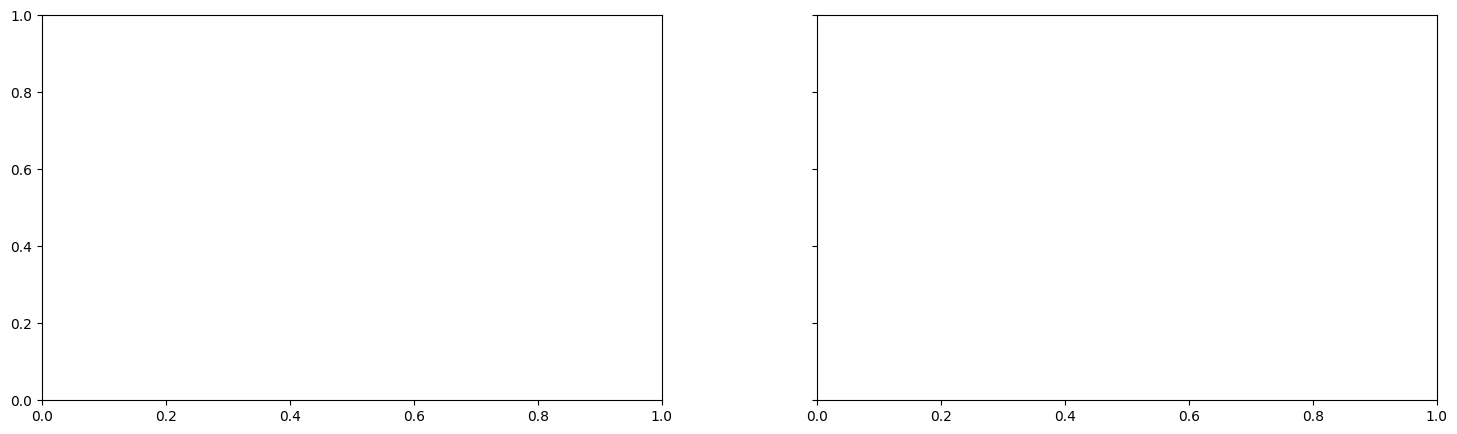

In [6]:
# np.random.seed(31)
w = 6; h = 5
ncols = 3
nrows = 1
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))
fig, ax = plt.subplots(nrows, 2, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
experiments = 5
trials = 1000
time = [i for i in range(trials)]

color1 = [0.1,0.2,0.6, 0.7]
color1c = [0.2,0.3,0.9, 0.4]
color2 = [0.1,0.6,0.2, 0.7]
color2c = [0.2,0.9,0.3, 0.4]
color3 = [0.6,0.2,0.1, 0.7]
color3c = [0.9,0.3,0.2, 0.4]
colors = [color1,color2,color3]
colors_c = [color1c,color2c,color3c]
labels = ["Sigmoid", "Stubborn", "Conformist"]

for ix, param in enumerate(param_vals):
    agent1_errors = []
    agent2_errors = []
    agent1_pref_errors = []
    agent2_pref_errors = []
    for e in range(experiments):
        # experiments
        behav_1 = np.random.rand(1,1)[0]
        behav_2 = np.random.rand(1,1)[0]
        R1 = np.random.rand(1,1)[0]
        R2 = np.random.rand(1,1)[0]
        b1 = np.random.rand(1,1)[0]
        b2 = np.random.rand(1,1)[0]

        
        plant1 = Plant(transition_matrix=T1, transition_function=transition, state=b1)
        plant2 = Plant(transition_matrix=T2, transition_function=transition, state=b2)

        conformist = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_conform,
        controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
        system_estimate=A2, reference=R2, init_behavior=b2)

        agent_8_6 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_8_6,
        controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
        system_estimate=A1, reference=R1, init_behavior=b1)

        stubborn = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
        controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
        system_estimate=A1, reference=R1, init_behavior=b1)

        conformist2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_conform,
        controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
        system_estimate=A1, reference=R1, init_behavior=b1)
        
        agents2 = [conformist]
        agents1 = [agent_8_6, stubborn, conformist2]

        agent2 = agents2[0]
        agent1 = agents1[param]
        agent1_error = []
        agent2_error = []
        agent1_pref_error = []
        agent2_pref_error = []
        for t in range(trials):
            #pl.scatter(agent1.get_reference()[0],-0.03, c=color1, edgecolors=[0.8,0.1,0.1, color1[1]])
            #pl.scatter(agent2.get_reference()[0],0, c=color2, edgecolors=[0.8,0.1,0.1, color2[3]], linewidth=1.5)
            b1_control = agent1.go(b2)   
            b2_control = agent2.go(b1)

            # agent1_control.append(agent1.get_output())
            # agent2_control.append(agent2.get_output())

            b1 = plant1.transition(b1_control)
            b2 = plant2.transition(b2_control)

            # agent1_behaviors.append(b1)
            # agent2_behaviors.append(b2)

            agent1_error.append(np.absolute(agent1.get_error()))
            agent2_error.append(np.absolute(agent2.get_error()))

            agent1_pref_error.append(np.absolute(R1-b2))
            agent2_pref_error.append(np.absolute(R2-b1))


            # agent1_reference.append(agent1.get_reference()[0])
            # agent2_reference.append(agent2.get_reference()[0])
        # aggregate the errors across experiments
        agent1_errors.append(agent1_error)
        agent2_errors.append(agent2_error)
        agent1_pref_errors.append(agent1_pref_error)
        agent2_pref_errors.append(agent2_pref_error)

    error1_mat = np.array(agent1_errors)
    error2_mat = np.array(agent2_errors)
    pref_error1_mat = np.array(agent1_pref_errors)
    pref_error2_mat = np.array(agent2_pref_errors)

    mean_error1 = np.average(error1_mat, axis=0)
    mean_error2 = np.average(error2_mat, axis=0)
    mean_pref_error1 = np.average(pref_error1_mat, axis=0)
    mean_pref_error2 = np.average(pref_error2_mat, axis=0)

    print(param)
    print("Agent 1")
    print(mean_error1[-1])
    print("Agent 2")
    print(mean_error2[-1])
    
    std_error1  = error1_mat.std(0)
    std_error2  = error2_mat.std(0)
    std_pref_error1  = pref_error1_mat.std(0)
    std_pref_error2  = pref_error2_mat.std(0)
    t = [n for n in range(trials)]
    ci1 = 1.96 * std_error1/np.sqrt(trials)
    ci2 = 1.96 * std_error2/np.sqrt(trials)
    pref_ci1 = 1.96 * std_pref_error1/np.sqrt(trials)
    pref_ci2 = 1.96 * std_pref_error2/np.sqrt(trials)

    upper1 = mean_error1+ci1
    lower1 = mean_error1-ci1
    pref_upper1 = mean_pref_error1+ci1
    pref_lower1 = mean_pref_error1-ci1
    upper1 = upper1.reshape(trials,)
    lower1 = lower1.reshape(trials,)
    pref_upper1 = pref_upper1.reshape(trials,)
    pref_lower1 = pref_lower1.reshape(trials,)
    upper2 = mean_error2+ci2
    lower2 = mean_error2-ci2
    pref_upper2 = mean_pref_error2+ci2
    pref_lower2 = mean_pref_error2-ci2
    upper2 = upper2.reshape(trials,)
    lower2 = lower2.reshape(trials,)
    pref_upper2 = pref_upper2.reshape(trials,)
    pref_lower2 = pref_lower2.reshape(trials,)
    # fig, ax = plt.subplots()
    # ax.plot(t,mean_error1, 'b',label="Agent 1")
    # ax.plot(t,mean_error2, 'g', label="Agent 2")
    # ax.fill_between(t, lower1, upper1, color='b', alpha=.1)
    # ax.fill_between(t, lower2, upper2, color='g', alpha=.1)

    # ai = tups[ix]
    
    # plots
    color = colors[param]
    color_c = colors_c[param]
    ax[0].plot(time, mean_error1, color=color,label=labels[param])
    ax[0].plot(time, mean_error2, color=color_c, label=labels[-1])
    ax[1].plot(time, mean_pref_error1, color=color,label=labels[param])
    ax[1].plot(time, mean_pref_error2, color=color_c, label=labels[-1])
    ax[0].fill_between(t, lower1, upper1, color=color, alpha=.1)
    ax[0].fill_between(t, lower2, upper2, color=color_c, alpha=.1)
    ax[1].fill_between(t, pref_lower1, pref_upper1, color=color, alpha=.1)
    ax[1].fill_between(t, pref_lower2, pref_upper2, color=color_c, alpha=.1)
    ax[0].legend()
    ax[1].legend()
    ax[0].set_xlabel("Error Relative to Expectation")
    ax[1].set_xlabel("Error Relative to Preference")
    ax[0].set_ylabel("Time Steps")
    ax[1].set_ylabel("Time Steps")
    # ax[ai].set_title('A1 =, A1 b = {}, A2 = conformist'.format(agents_k[param], agents_b[param]))
    ax[0].set_title("Aggregated Interactions Error Relative to Expectation", fontsize=20, pad=20)
    ax[1].set_title("Aggregated Interactions Error Relative to Preference", fontsize=20, pad=20)
    # ax[ai].set_xlim(0,t)
    ax[0].set_ylim(0,1)
    ax[1].set_ylim(0,1)
    ax[0].tick_params(axis='x')
    ax[0].tick_params(axis='y')
    ax[1].tick_params(axis='x')
    ax[1].tick_params(axis='y')
    ax[0].set_xlabel("Time Step", fontsize=16)
    ax[0].set_ylabel("Absolute Error", fontsize=16)
    ax[1].set_xlabel("Time Step", fontsize=16)
    ax[1].set_ylabel("Absolute Error", fontsize=16)

print("\n Sigmoid Model Agents (Error Relative to Expectation + Preference)")
print("Agent 1 darker and manipulated")
print("Agent 2 is lighter and conforms")
print("blue experiment is sigmoid")
print("green experiment is stubborn")
print("red experiment is conformists")
print("Initial  behavior and reference signals are randomly initialized")
plt.show()